# 2 Gradient Descent and Step Length Controller

[1 point] Implement a 3D plot to visualize the function (Use Matplotlib’s 3D utilities)

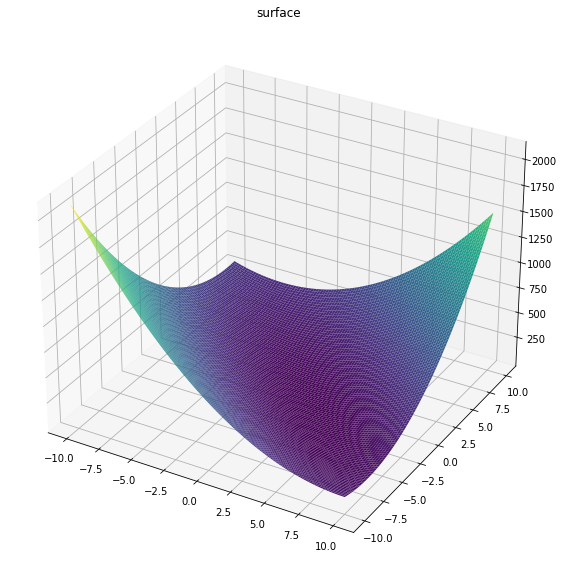

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return ((x+2*y)**2 + (2*x + y - 5)**2)

x = np.linspace(10, -10, 100)
y = np.linspace(10, -10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(20,10))
# ax.view_init(60, 35)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',)
ax.set_title('surface');

Derive the partial gradients.

In [47]:
#Importing sympy
 
from sympy import *
 
# create a "symbol" called x
x, y,= symbols('x y', real=True)
 
#Define function
f = (x+2*y)**2 + (2*x + y - 5)**2

#Calculating Derivative
derivative_f_x = f.diff(x)
derivative_f_y = f.diff(y)
print("\n The calculated partial derivatives are :\n")
derivative_f_x,derivative_f_y


 The calculated partial derivatives are :



(10*x + 8*y - 20, 8*x + 10*y - 10)

Optimize the function with Gradient Descent. Set the appropriate hyperparameters like initial
values of (x,y) and the steplength α through trial and error.

In [33]:
x = np.arange(-4,4,1)
y = np.arange(-4,4,1)


In [34]:
f = (x+2*y)**2 + (2*x + y - 5)**2
f

array([433, 277, 157,  73,  25,  13,  37,  97])

In [46]:
# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    trajectory = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        trajectory.append(cost)
        #print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta,trajectory

#  X = np.array([41.9,43.4,43.9,44.5,47.3,47.5,47.9,50.2,52.8,53.2,56.7,57.0,63.5,65.3,71.1,77.0,77.8])
#  y = np.array([251.3,251.3,248.3,267.5,273.0,276.5,270.3,274.9,285.0,290.0,297.0,302.5,304.5,309.3,321.7,330.7,349.0])
n = np.max(x.shape)
new_x = np.vstack([np.ones(n), x,y]).T      
m, n = np.shape(new_x)
numIterations= 100000
alpha = 0.001
theta = np.random.rand(n)
theta,trajectory = gradientDescent(new_x, f, theta, alpha, m, numIterations)
print("\n The calculated coefficeinst using gradient descent technique :\n",theta)
# print(trajectory)


 The calculated coefficeinst using gradient descent technique :
 [115.         -24.22074616 -23.77925384]


Implement the function that controls the step length (stepsize-backtracking from the slides).

In [45]:
# m denotes the number of examples here, not the number of features
def backtracking_gradientDescent(x, y, theta, alpha, m, numIterations,beta):
    xTrans = x.transpose()
    t=1
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - t*alpha * gradient
        t*=beta
    return theta,t

#  X = np.array([41.9,43.4,43.9,44.5,47.3,47.5,47.9,50.2,52.8,53.2,56.7,57.0,63.5,65.3,71.1,77.0,77.8])
#  y = np.array([251.3,251.3,248.3,267.5,273.0,276.5,270.3,274.9,285.0,290.0,297.0,302.5,304.5,309.3,321.7,330.7,349.0])
# n = np.max(x.shape)
# new_x = np.vstack([np.ones(n), x,y]).T      
# m, n = np.shape(new_x)
# numIterations= 100000
# alpha = 0.001
# theta = np.random.rand(n)
theta,stepsize = backtracking_gradientDescent(new_x, f, theta, alpha, m, numIterations=100,beta=0.5)
print("\n The calculated coefficeinst using bactracking technique :\n",theta)
print("\n The calculated steplength using bactracking technique :\n",stepsize)


 The calculated coefficeinst using bactracking technique :
 [115.        -24.1130002 -23.8869998]

 The calculated steplength using bactracking technique :
 7.888609052210118e-31
